<a href="https://colab.research.google.com/github/pponvannan/AIMLMadeEasy/blob/master/article_reccomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('result_final.csv')

In [7]:
data.shape

(2190, 9)

In [8]:
data.head()

,Unnamed: 0,Unnamed: 0.1,link,text,title,date,keywords,summary,title_summary
0,0,0,http://techcrunch.com/2020/09/07/vodafone-idea...,"Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...,2020-09-07 00:00:00,"['rebrands', 'idea', 'vi', 'giant', 'brand', '...","Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...
1,1,1,http://techcrunch.com/2020/09/16/facebook-addr...,"At the beginning of the previous decade, Faceb...",Facebook addresses political controversy in In...,2020-09-16 00:00:00,"['opportunities', 'whatsapp', 'controversy', '...",Politicians in the country today heavily rely ...,Facebook addresses political controversy in In...
2,2,2,http://techcrunch.com/2020/09/14/youtube-launc...,"As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho...",2020-09-14 00:00:00,"['rival', 'video', 'feature', 'access', 'youtu...","As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho..."
3,3,3,http://techcrunch.com/2020/09/09/groww-an-inve...,Even as more than 150 million people are using...,"Groww, an investment app for millennials in In...",2020-09-09 00:00:00,"['world', 'yc', 'continuity', 'stocks', 'groww...","YC Continuity, the growth-stage investment fun...","Groww, an investment app for millennials in In..."
4,4,4,http://techcrunch.com/2020/09/15/lanzatech-is-...,As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...,2020-09-15 00:00:00,"['production', 'distributed', 'developing', 's...",As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...


In [9]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)

In [10]:
data.shape

(2190, 9)

In [11]:
data.insert(0,'id',range(0,data.shape[0]))
data

,id,Unnamed: 0,Unnamed: 0.1,link,text,title,date,keywords,summary,title_summary
0,0,0,0,http://techcrunch.com/2020/09/07/vodafone-idea...,"Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...,2020-09-07 00:00:00,"['rebrands', 'idea', 'vi', 'giant', 'brand', '...","Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...
1,1,1,1,http://techcrunch.com/2020/09/16/facebook-addr...,"At the beginning of the previous decade, Faceb...",Facebook addresses political controversy in In...,2020-09-16 00:00:00,"['opportunities', 'whatsapp', 'controversy', '...",Politicians in the country today heavily rely ...,Facebook addresses political controversy in In...
2,2,2,2,http://techcrunch.com/2020/09/14/youtube-launc...,"As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho...",2020-09-14 00:00:00,"['rival', 'video', 'feature', 'access', 'youtu...","As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho..."
3,3,3,3,http://techcrunch.com/2020/09/09/groww-an-inve...,Even as more than 150 million people are using...,"Groww, an investment app for millennials in In...",2020-09-09 00:00:00,"['world', 'yc', 'continuity', 'stocks', 'groww...","YC Continuity, the growth-stage investment fun...","Groww, an investment app for millennials in In..."
4,4,4,4,http://techcrunch.com/2020/09/15/lanzatech-is-...,As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...,2020-09-15 00:00:00,"['production', 'distributed', 'developing', 's...",As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...
...,...,...,...,...,...,...,...,...,...,...
2185,2185,1285,1285,https://uk.reuters.com/article/uk-brazil-econo...,BRASILIA (Reuters) - Paulo Guedes has faced hi...,Brazil's Guedes finds influence waning as Bols...,2020-09-16 18:18:18+00:00,"['bolsonaro', 'guedes', 'reins', 'economic', '...",FILE PHOTO: Brazil's Economy Minister Paulo Gu...,Brazil's Guedes finds influence waning as Bols...
2186,2186,1286,1286,https://www.reuters.com/article/us-britain-boe...,LONDON (Reuters) - The Bank of England is expe...,Bank of England gears up for next stimulus push,2020-09-16 23:07:30+00:00,"['push', 'bank', 'england', 'zero', 'signal', ...",LONDON (Reuters) - The Bank of England is expe...,Bank of England gears up for next stimulus pus...
2187,2187,1287,1287,https://www.reuters.com/article/syria-crisis-f...,AMMAN (Reuters) - Syria is experiencing worsen...,Syria says U.S. sanctions behind acute fuel cr...,2020-09-16 23:25:09+00:00,"['shortages', 'imports', 'gasoline', 'shipment...",AMMAN (Reuters) - Syria is experiencing worsen...,Syria says U.S. sanctions behind acute fuel cr...
2188,2188,1288,1288,https://af.reuters.com/article/uk-iran-usa-wor...,Curiosity high for TV's anything-can-happen vi...,"Business & Financial News, U.S & International...",NaN,"['international', 'tvs', 'sundays', 'united', ...",Curiosity high for TV's anything-can-happen vi...,"Business & Financial News, U.S & International..."


In [12]:
ds = data[['date','title','text','link']]

In [13]:
ds.shape

(2190, 4)

In [14]:
ds = ds.dropna()

In [15]:
ds = ds.drop_duplicates(subset=None, keep='first', inplace=False)

In [16]:
ds.insert(0,'id',range(0,ds.shape[0]))

In [17]:
ds.shape

(1496, 5)

In [18]:
ds.head()

,id,date,title,text,link
0,0,2020-09-07 00:00:00,Indian telecom giant Vodafone Idea rebrands as...,"Vodafone Idea, one of the largest telecom oper...",http://techcrunch.com/2020/09/07/vodafone-idea...
1,1,2020-09-16 00:00:00,Facebook addresses political controversy in In...,"At the beginning of the previous decade, Faceb...",http://techcrunch.com/2020/09/16/facebook-addr...
2,2,2020-09-14 00:00:00,"YouTube launches its TikTok rival, YouTube Sho...","As TikTok’s fate in the U.S. remains murky, Yo...",http://techcrunch.com/2020/09/14/youtube-launc...
3,3,2020-09-09 00:00:00,"Groww, an investment app for millennials in In...",Even as more than 150 million people are using...,http://techcrunch.com/2020/09/09/groww-an-inve...
4,4,2020-09-15 00:00:00,LanzaTech is developing a small-scale waste bi...,As part of the continuing global rollout of La...,http://techcrunch.com/2020/09/15/lanzatech-is-...


In [19]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Function for removing NonAscii characters
#def _removeNonAscii(s):
#    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    texts = [w for w in text if w.isalpha()]
    texts = " ".join(texts)
    return texts

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
#ds['cleaned_desc'] = ds['text'].apply(_removeNonAscii)
ds['cleaned_desc'] = ds['text'].apply(func = make_lower_case)
ds['cleaned_desc'] = ds.cleaned_desc.apply(func = remove_stop_words)
ds['cleaned_desc'] = ds.cleaned_desc.apply(func=remove_punctuation)
ds['cleaned_desc'] = ds.cleaned_desc.apply(func=remove_html)

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## analyzer -- to select individual words# default 
## max_df[0.0,1.0] - used to ignore words with frequency more than 0.8 these words can be useless words as these words may appear only once and may not have a significant meaning
## min_df -- similar reason as the above one. 
## use_idfbool, default=True  -- Enable inverse-document-frequency reweighting.

tf = TfidfVectorizer(analyzer='word',stop_words='english',max_df=0.8,min_df=0.0,use_idf=True,ngram_range=(1,3))
tfidf_matrix = tf.fit_transform(ds['cleaned_desc'])

In [24]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())

,aa,aa batteries,aa batteries set,aa lithium,aa lithium later,aaa,aaa affirmed,aaa affirmed shubhshree,aaa titles,aaa titles hard,aakash,aakash jagadeesh,aakash jagadeesh babu,aaron,aaron cockerill,aaron cockerill nicolas,aaron declined,aaron declined comment,aaron finch,aaron finch adam,aaron finch adil,aaron finch chris,aaron gruff,aaron gruff binge,aaron levie,aaron levie guy,aaron levie says,aaron rai,aaron rai dale,aaron rai richie,aaron ramsdale,aaron ramsdale bournemouth,aaron rupar,aaron rupar august,aas,aas doubling,aas doubling total,aas plus,aas plus includes,ab,...,zverev got,zverev got tricky,zverev lashed,zverev lashed martina,zverev overcomes,zverev overcomes anderson,zverev overcomes teenager,zverev stretched,zverev stretched sets,zwickau,zwickau manufacturing,zwickau manufacturing vw,zwickau plant,zwickau plant producing,zwicker,zwicker attributes,zwicker attributes action,zwift,zwift brought,zwift brought aboard,zwift charges,zwift charges month,zwift hosted,zwift hosted july,zwift immersive,zwift immersive seamless,zwift jumping,zwift jumping headfirst,zwift possible,zwift possible bring,zwift prides,zwift prides ability,zwift raised,zwift raised million,𝗺𝗼𝗻𝘁𝗵,𝗺𝗼𝗻𝘁𝗵 pandemic,𝗺𝗼𝗻𝘁𝗵 pandemic sustain,𝗽𝗲𝗿,𝗽𝗲𝗿 𝗺𝗼𝗻𝘁𝗵,𝗽𝗲𝗿 𝗺𝗼𝗻𝘁𝗵 pandemic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [25]:
tfidf_matrix

<1496x588777 sparse matrix of type '<class 'numpy.float64'>'
	with 921293 stored elements in Compressed Sparse Row format>

In [26]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [27]:
cosine_similarities.shape

(1496, 1496)

In [28]:
ds.iloc[1037,:]

id                                                           1037
date                                    2020-09-01 09:41:31+00:00
title           Amadeus hires former Vodafone exec Streichert ...
text            FILE PHOTO: The logo of Amadeus IT Holding can...
link            https://www.reuters.com/article/us-amadeus-it-...
cleaned_desc    file logo amadeus holding seen june comas amad...
Name: 1564, dtype: object

In [29]:
ds.reset_index(drop=True,inplace=True)

In [30]:
results = {}
for idx, row in ds.iterrows():
    try:
        similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
        similar_items = [(cosine_similarities[idx][i], ds.iloc[i,0]) for i in similar_indices]
        results[row['id']] = similar_items[1:]
    except:
        print(idx)
        similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
        print(similar_indices)
        print("error")
        break
print('done!')


done!


In [31]:
similar_indices[:100]

array([1495,   37,  237,  987,  148,  818,  151, 1341, 1448,  835,   33,
       1188, 1189, 1153, 1151, 1357,  115,  299, 1139, 1145,  260,  265,
        191, 1136,  249,   36, 1113,  998, 1109, 1106, 1349, 1362, 1356,
        114,  997, 1265, 1368,  192, 1142,   48,  262, 1171, 1437, 1304,
        194, 1390,  137, 1351,  169, 1303, 1206, 1388, 1134,  959, 1027,
        127, 1364,  112, 1111, 1105,   39,  983,  984, 1272,  120,  293,
       1156, 1161, 1062, 1150, 1386, 1290, 1148, 1205, 1141,  155,  921,
        920,   31, 1387, 1467, 1477, 1162,  292, 1471, 1137,  972, 1365,
       1360, 1382, 1314, 1493, 1144, 1155, 1352, 1397,  288,  282,  882])

In [32]:

def item(id):
    return ds.loc[ds['id'] == id]['title'].tolist()[0].split(' - ')[0]

# Just reads the results out of the dictionary.
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended : " + item(rec[1]) + " (score:" + str(rec[0]) + ")",end='\n\n')

recommend(item_id=1, num=15)

Recommending 15 products similar to Facebook addresses political controversy in India, monetization opportunities, startup investments – TechCrunch...
-------
Recommended : Facebook returns to its roots with Campus, a college student-only social network – TechCrunch (score:0.1296516406820755)

Recommended : Facebook denounces hate, bigotry, its India chief says amid content row (score:0.1293879914869318)

Recommended : What Facebook should do about its Kenosha problem (score:0.11529368168436224)

Recommended : Facebook announces $4.3 million grant for small businesses in India, introduces support for gift cards – TechCrunch (score:0.10267832144871847)

Recommended : IT minister Ravi Shankar Prasad accuses Facebook of bias amid row over content (score:0.10089196403126324)

Recommended : IT minister Ravi Shankar Prasad accuses Facebook of bias amid row over content (score:0.10089196403126324)

Recommended : Facebook partially documents its content recommendation system – TechCrunch (scor

In [33]:
cosine_similarities

array([[1.00000000e+00, 5.02689585e-02, 7.40465108e-03, ...,
        2.83329826e-03, 2.52771507e-03, 4.38640282e-03],
       [5.02689585e-02, 1.00000000e+00, 2.01145092e-02, ...,
        5.55984926e-03, 6.30472309e-03, 2.22964674e-03],
       [7.40465108e-03, 2.01145092e-02, 1.00000000e+00, ...,
        2.41903652e-03, 7.02318301e-04, 3.98714537e-03],
       ...,
       [2.83329826e-03, 5.55984926e-03, 2.41903652e-03, ...,
        1.00000000e+00, 4.74725861e-03, 1.17202792e-02],
       [2.52771507e-03, 6.30472309e-03, 7.02318301e-04, ...,
        4.74725861e-03, 1.00000000e+00, 2.88005595e-03],
       [4.38640282e-03, 2.22964674e-03, 3.98714537e-03, ...,
        1.17202792e-02, 2.88005595e-03, 1.00000000e+00]])

In [34]:
def recomendation(idx,no_of_news_article):
    #get similarity values with other articles
    similarity_score = list(enumerate(cosine_similarities[idx]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the n most similar news articles. Ignore the first movie.
    similarity_score = similarity_score[1:no_of_news_article+1]
    
    print("Article Read -- " + ds['title'].iloc[idx] +" link --"+ ds['link'].iloc[idx])
    print(" ---------------------------------------------------------- ")
    news_indices = [i[0] for i in similarity_score]
    for i in range(len(news_indices)):
        print("Recomendation "+ str(i+1)+" --- " +str(news_indices[i])+"(IDX)  "+str(ds['date'].iloc[news_indices[i]])+" : "+
              ds['title'].iloc[news_indices[i]] +" || Link --"+ ds['link'].iloc[news_indices[i]] +" score -- "+ str(similarity_score[i][1]))
        print()

In [35]:
idx=3  #min_df=0.2 shape 1496 rows × 31 columns
no_of_news_article=10
recomendation(idx,no_of_news_article)

Article Read -- Groww, an investment app for millennials in India, raises $30M led by YC Continuity – TechCrunch link --http://techcrunch.com/2020/09/09/groww-an-investment-app-for-millennials-in-india-raises-30m-led-by-yc-continuity/
 ---------------------------------------------------------- 
Recomendation 1 --- 176(IDX)  2020-09-02 00:00:00 : 3one4 Capital launches $100M fund to back early-stage startups in India – TechCrunch || Link --http://techcrunch.com/2020/09/02/3one4-capital-launches-100m-fund-to-back-early-stage-startups-in-india/ score -- 0.05712325226508238

Recomendation 2 --- 9(IDX)  2020-09-07 00:00:00 : Silver Lake leads $500 million investment round in Indian online learning giant Byju’s – TechCrunch || Link --http://techcrunch.com/2020/09/07/silver-lake-leads-500-million-round-in-indias-byjus/ score -- 0.05012420506583725

Recomendation 3 --- 7(IDX)  2020-09-15 00:00:00 : Virtual events platform Airmeet raises $12M – TechCrunch || Link --http://techcrunch.com/2020/09

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## analyzer -- to select individual words# default 
## max_df[0.0,1.0] - used to ignore words with frequency more than 0.8 these words can be useless words as these words may appear only once and may not have a significant meaning
## min_df -- similar reason as the above one. 
## use_idfbool, default=True  -- Enable inverse-document-frequency reweighting.

tf = TfidfVectorizer(analyzer='word',stop_words='english',max_df=0.8,min_df=0.0,use_idf=True,ngram_range=(1,3))
tfidf_matrix = tf.fit_transform(ds['cleaned_desc'])

In [37]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [38]:
idx=3  #min_df=0.0 shape 1496 rows × 31 columns
no_of_news_article=10
recomendation(idx,no_of_news_article)

Article Read -- Groww, an investment app for millennials in India, raises $30M led by YC Continuity – TechCrunch link --http://techcrunch.com/2020/09/09/groww-an-investment-app-for-millennials-in-india-raises-30m-led-by-yc-continuity/
 ---------------------------------------------------------- 
Recomendation 1 --- 176(IDX)  2020-09-02 00:00:00 : 3one4 Capital launches $100M fund to back early-stage startups in India – TechCrunch || Link --http://techcrunch.com/2020/09/02/3one4-capital-launches-100m-fund-to-back-early-stage-startups-in-india/ score -- 0.057123252265082164

Recomendation 2 --- 9(IDX)  2020-09-07 00:00:00 : Silver Lake leads $500 million investment round in Indian online learning giant Byju’s – TechCrunch || Link --http://techcrunch.com/2020/09/07/silver-lake-leads-500-million-round-in-indias-byjus/ score -- 0.0501242050658371

Recomendation 3 --- 7(IDX)  2020-09-15 00:00:00 : Virtual events platform Airmeet raises $12M – TechCrunch || Link --http://techcrunch.com/2020/09

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## analyzer -- to select individual words# default 
## max_df[0.0,1.0] - used to ignore words with frequency more than 0.8 these words can be useless words as these words may appear only once and may not have a significant meaning
## min_df -- similar reason as the above one. 
## use_idfbool, default=True  -- Enable inverse-document-frequency re-weighting.

tf = TfidfVectorizer(analyzer='word',stop_words='english',max_df=0.8,min_df=0.1,use_idf=False,ngram_range=(1,3))
tfidf_matrix = tf.fit_transform(ds['cleaned_desc'])
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [40]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())

,able,access,according,added,adding,ahead,american,amid,announced,august,available,away,bank,based,best,better,big,biggest,billion,build,business,buy,called,came,capital,cases,central,ceo,change,chief,china,close,come,comes,companies,company,continue,coronavirus,country,current,...,service,services,set,share,small,social,start,started,state,states,support,taken,taking,team,tech,technology,things,think,time,times,today,told,took,total,trump,united,united states,use,used,using,video,want,way,week,work,working,world,year,years,york
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.079057,0.000000,0.000000,0.316228,0.079057,0.079057,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.079057,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.079057,0.316228,0.079057,0.000000,0.079057,0.0,...,0.000000,0.079057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.237171,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237171,0.0
1,0.050063,0.150188,0.050063,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100125,0.100125,0.200250,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.050063,0.000000,0.050063,0.500626,0.000000,0.000000,0.200250,0.0,...,0.100125,0.000000,0.000000,0.000000,0.050063,0.100125,0.000000,0.050063,0.050063,0.000000,0.000000,0.0,0.200250,0.150188,0.0,0.000000,0.0,0.100125,0.000000,0.0,0.050063,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.050063,0.050063,0.000000,0.000000,0.050063,0.000000,0.050063,0.000000,0.000000,0.0
2,0.000000,0.262049,0.000000,0.065512,0.0,0.0,0.000000,0.000000,0.196537,0.000000,0.065512,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.065512,0.000000,0.131024,0.065512,0.000000,0.000000,0.0,...,0.000000,0.000000,0.131024,0.000000,0.065512,0.065512,0.065512,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.196537,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.065512,0.393073,0.000000,0.000000,0.000000,0.000000,0.065512,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.073721,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.073721,0.0,0.000000,0.000000,0.073721,0.000000,0.073721,0.000000,0.000000,0.073721,0.000000,0.147442,0.0,0.000000,0.147442,0.0,0.000000,0.000000,0.073721,0.073721,0.0,0.0,0.073721,0.000000,0.000000,0.073721,0.000000,0.000000,0.073721,0.0,...,0.000000,0.073721,0.000000,0.000000,0.073721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.073721,0.0,0.000000,0.000000,0.000000,0.0,0.073721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073721,0.0
4,0.000000,0.000000,0.353553,0.000000,0.0,0.0,0.000000,0.000000,0.117851,0.000000,0.000000,0.0,0.000000,0.117851,0.000000,0.000000,0.117851,0.000000,0.117851,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.117851,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.117851,0.000000,0.000000,0.117851,0.0,...,0.000000,0.000000,0.000000,0.000000,0.235702,0.000000,0.000000,0.000000,0.000000,0.117851,0.000000,0.0,0.000000,0.000000,0.0,0.235702,0.0,0.117851,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.117851,0.117851,0.117851,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117851,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [41]:
idx=3  #min_df=0.0 shape 1496 rows × 31 columns
no_of_news_article=10
recomendation(idx,no_of_news_article)

#  seeing a significant change in the similarity score as it has not been L2 regulerised. 

Article Read -- Groww, an investment app for millennials in India, raises $30M led by YC Continuity – TechCrunch link --http://techcrunch.com/2020/09/09/groww-an-investment-app-for-millennials-in-india-raises-30m-led-by-yc-continuity/
 ---------------------------------------------------------- 
Recomendation 1 --- 9(IDX)  2020-09-07 00:00:00 : Silver Lake leads $500 million investment round in Indian online learning giant Byju’s – TechCrunch || Link --http://techcrunch.com/2020/09/07/silver-lake-leads-500-million-round-in-indias-byjus/ score -- 0.652055938099267

Recomendation 2 --- 7(IDX)  2020-09-15 00:00:00 : Virtual events platform Airmeet raises $12M – TechCrunch || Link --http://techcrunch.com/2020/09/15/virtual-events-platform-airmeet-raises-12m/ score -- 0.6474152236749179

Recomendation 3 --- 177(IDX)  2020-09-02 00:00:00 : India’s Zomato raises $62 million from Temasek – TechCrunch || Link --http://techcrunch.com/2020/09/02/indias-zomato-raises-62-million-from-temasek/ score 

In [42]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 9.83 s, sys: 5.7 ms, total: 9.84 s
Wall time: 9.85 s


In [43]:
ds.insert(2,'cluster',clusters)

#ds.insert(0,'id',range(0,ds.shape[0]))

In [44]:
ds.head()

,id,date,cluster,title,text,link,cleaned_desc
0,0,2020-09-07 00:00:00,3,Indian telecom giant Vodafone Idea rebrands as...,"Vodafone Idea, one of the largest telecom oper...",http://techcrunch.com/2020/09/07/vodafone-idea...,vodafone one largest telecom operators rebrand...
1,1,2020-09-16 00:00:00,2,Facebook addresses political controversy in In...,"At the beginning of the previous decade, Faceb...",http://techcrunch.com/2020/09/16/facebook-addr...,beginning previous facebook tiny presence star...
2,2,2020-09-14 00:00:00,4,"YouTube launches its TikTok rival, YouTube Sho...","As TikTok’s fate in the U.S. remains murky, Yo...",http://techcrunch.com/2020/09/14/youtube-launc...,fate remains youtube today announced launch ne...
3,3,2020-09-09 00:00:00,2,"Groww, an investment app for millennials in In...",Even as more than 150 million people are using...,http://techcrunch.com/2020/09/09/groww-an-inve...,even million people using digital payment apps...
4,4,2020-09-15 00:00:00,4,LanzaTech is developing a small-scale waste bi...,As part of the continuing global rollout of La...,http://techcrunch.com/2020/09/15/lanzatech-is-...,part continuing global rollout technology capt...


In [45]:
ds['cluster'].value_counts()

4    487
2    406
3    396
1    177
0     30
Name: cluster, dtype: int64

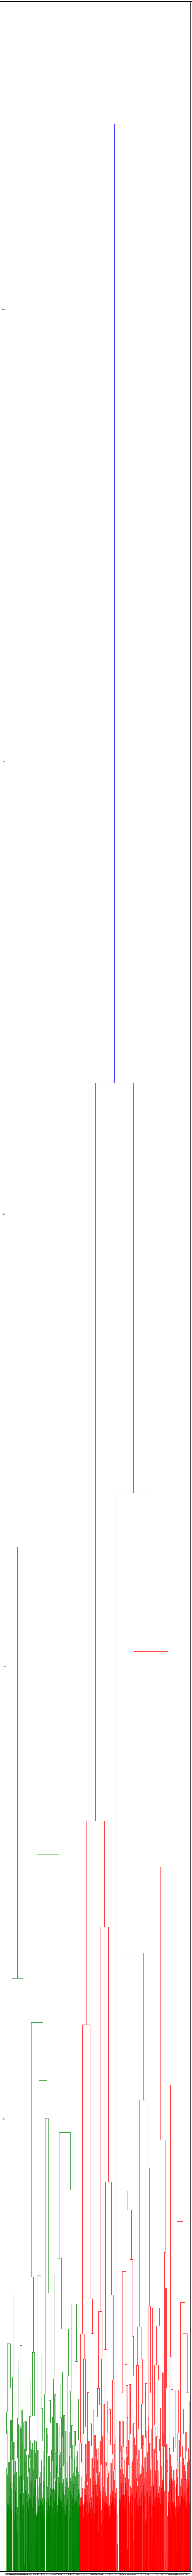

In [46]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 200)) # set size
ax = dendrogram(linkage_matrix)

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
               width=10000)

plt.tight_layout() #show plot with tight layout


In [ ]:
## Implementing Topic modelling -- LSH 